# 1. Introduction

- **Project Name:** Find Out Which States Are Safer From Gun Violence In The United States For 2023
___
- **Analyst:** Muhammad Fattahillah
___ 
- **Tableau Dashboard url:** https://public.tableau.com/views/Milestone1-USGunViolence/Milestone1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link
___


# 2. Identification of Problems

Before processing and analyzing data, we must know the Problem Statement first, and describe the problem from the Problem Statement that we decided on.

**Problem Statement:** Finding out which states are safer from gun violence in the United States for 2023.

**Problem Description:**
- *Question 1:* Overall, what is the mean, median, and mode of death and injury resulting from gun violence in the US?
    
- *Question 2:* Overall cases of gun violence in the US, are more victims injured than victims who die?
    
- *Question 3:* What is the percentage of total deaths and injuries due to firearm violence in the US?

- *Question 4:* What are the total number of injured and killed victims of firearm violence cases in the US?

- *Question 5:* Which state in the US has the greatest amount of gun violence?

- *Question 6:* Which state in the US has the lowest amount of gun violence?

- *Question 7:* Which year shows the largest and smallest cases of gun violence?

# 3. Data Loading

After deciding on the Problem Statement and describing the problem, next we will explore the dataset.

Import required libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

Data source:
- Url: https://www.kaggle.com/datasets/konivat/us-gun-violence-archive-2014
- Collaborators: Konivat(Owner)
- License: Data files © Original Authors

Import the required CSV dataset:

In [2]:
df = pd.read_csv('US-Gun-Violence.csv')

Displays a summary of the dataset that has been imported:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4373 entries, 0 to 4372
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     4373 non-null   int64  
 1   incident_date   4373 non-null   object 
 2   state           4373 non-null   object 
 3   city_or_county  4373 non-null   object 
 4   address         4360 non-null   object 
 5   killed          4373 non-null   int64  
 6   injured         4371 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 239.3+ KB


Showing top 5 data:

In [4]:
df.head(5)

,incident_id,incident_date,state,city_or_county,address,killed,injured
0,2639130,June 30 2023,California,Florin,7870 Florin Rd,0,4.0
1,2639623,June 30 2023,Illinois,Chicago,6300 block of S Artesian Ave,1,3.0
2,2638784,June 29 2023,Texas,Odessa,4310 N Dixie Blvd,1,4.0
3,2638465,June 28 2023,North Carolina,Greensboro,5100 Bayberry St,3,2.0
4,2636671,June 26 2023,Michigan,Ypsilanti,800 block of George Pl,2,2.0


From the results of the simple data exploration above, we can do basic data cleaning, such as:
- Changed the data types 'incident_date' and 'killed'.
- Drop column address from the table, because it is not needed for calculations and analysis.
- Changed column names to make them look neater and easier to read.
- Filter the dataset to only show rows in 2021-2023.

Checking for missing values:

In [5]:
print('Check Missing Value: ', df.isnull().value_counts())
print('\nCheck Duplicated: ', df.duplicated().value_counts())

Check Missing Value:  incident_id  incident_date  state  city_or_county  address  killed  injured
False        False          False  False           False    False   False      4358
                                                   True     False   False        13
                                                   False    False   True          2
dtype: int64

Check Duplicated:  False    4373
dtype: int64


From the results of the checks above, we can find out that:
- There are missing values in the 'address' and 'injured' columns.
- There are no duplicate data in this data.

# 4. Data Cleaning

In this section, we will carry out data cleaning on the dataset according to the exploration results and for later analysis:

In [6]:
# Change the data type
df['killed'] = df['killed'].astype(float)
df['incident_date'] = pd.to_datetime(df['incident_date'])

# Create a filter to display data from 2021 and above only
df = df[df['incident_date'].dt.year >= 2021]

# Change column names
df.rename(columns={
    'incident_id': 'Incident ID',
    'incident_date': 'Incident Date',
    'state': 'State',
    'city_or_county': 'City or County',
    'address': 'Address',
    'killed': 'Killed',
    'injured': 'Injured'
}, inplace=True)

# Arrange the columns in the desired order
column_order = [
    'Incident ID', 'Incident Date', 'State', 
    'City or County', 'Killed', 'Injured'
]
df = df[column_order]

# Delete rows that have the value None from column 'Injured'
df = df.dropna(subset=['Injured'])

# Displays data that has been changed
df.head(5)

,Incident ID,Incident Date,State,City or County,Killed,Injured
0,2639130,2023-06-30,California,Florin,0.0,4.0
1,2639623,2023-06-30,Illinois,Chicago,1.0,3.0
2,2638784,2023-06-29,Texas,Odessa,1.0,4.0
3,2638465,2023-06-28,North Carolina,Greensboro,3.0,2.0
4,2636671,2023-06-26,Michigan,Ypsilanti,2.0,2.0


Displays the dataset summary again:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1673 entries, 0 to 1674
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Incident ID     1673 non-null   int64         
 1   Incident Date   1673 non-null   datetime64[ns]
 2   State           1673 non-null   object        
 3   City or County  1673 non-null   object        
 4   Killed          1673 non-null   float64       
 5   Injured         1673 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 91.5+ KB


After data cleaning has been carried out on the dataset, we can see that the column names are neat, there are no missing values in each row, and the data types of all columns are as desired for later analysis and calculations.

Saving cleaned data locally:

In [8]:
df.to_csv('US-Gun-Violence-Clean.csv')

# 5. Analysis and Calculation

## Questions 1
***Descriptive Statistics: Central Tendency***
- Overall, what is the mean, median, and mode of death and injury resulting from gun violence in the US?

In [9]:
# Central tendency

mean = df[["Killed", "Injured"]].mean()
median = df[["Killed", "Injured"]].median()
mode = df[["Killed", "Injured"]].mode()

print('Mean:\n', mean)
print('\nMedian:\n', median)
print('\nMode:\n', mode)

Mean:
 Killed     1.034668
Injured    4.112373
dtype: float64

Median:
 Killed     1.0
Injured    4.0
dtype: float64

Mode:
    Killed  Injured
0     0.0      4.0


- **Mean (Average):**
     Overall, the average number of victims in each case was about 1 person killed and 4 people injured.

- **Median (Middle Value):**
     Overall, the median values indicate that half of the cases had a death toll of 1 person or less, and the other half had a death toll of 4 or less.

- **Mode (Mode):**
     The mode is the value that appears most frequently in a data set. In this case, the mode shows that the number of victims killed most often is 0, meaning that many cases do not result in death. Meanwhile, the most frequent mode for the number of injured victims is 4, meaning that the number of injured victims is 4 people most often.

## Question 2
***Inferential Statistics: Hypothesis Testing, T-test***
- Overall cases of gun violence in the US, are more victims injured than victims who die?

     - H0 = There are more cases of injured victims than cases of dead victims.
     - H1 = There are no more cases of injured victims than cases of dead victims.

In [10]:
# Counting the number of injured and dead
total_injured = df["Injured"].sum()
total_killed = df["Killed"].sum()

# Test the t-test statistic to see whether the difference is significant
t_statistic, p_value = ttest_ind(df["Injured"], df["Killed"], equal_var=False)

# Displays results
print("Total korban terluka:", total_injured)
print("Total korban mati:", total_killed)
print("T-statistic:", t_statistic)
print("P-value:", p_value)

Total korban terluka: 6880.0
Total korban mati: 1731.0
T-statistic: 45.312326049142534
P-value: 0.0


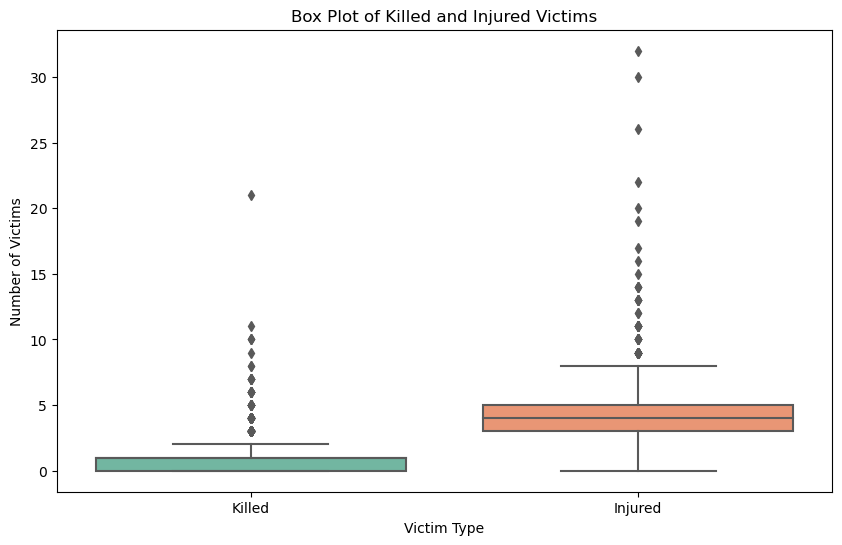

In [11]:
# Creating the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Killed', 'Injured']], palette='Set2')
plt.xlabel("Victim Type")
plt.ylabel("Number of Victims")
plt.title("Box Plot of Killed and Injured Victims")
plt.xticks(ticks=[0, 1], labels=['Killed', 'Injured'])
plt.show()

From the Hypothesis results above, it shows that the distribution of data from Killed and Injured is a non-normal distribution, because many cases have significantly different numbers of victims from other cases, therefore these outliers do not have to be removed. And the total number of injured victims is greater than the number of dead victims. That means, H0 from the question is accepted.

## Question 3
***Visualization***
- What is the percentage of total deaths and injuries due to firearm violence in the US throughout 2021-2023?

Here we will create a pie chart that shows the percentage of total killed and injured:

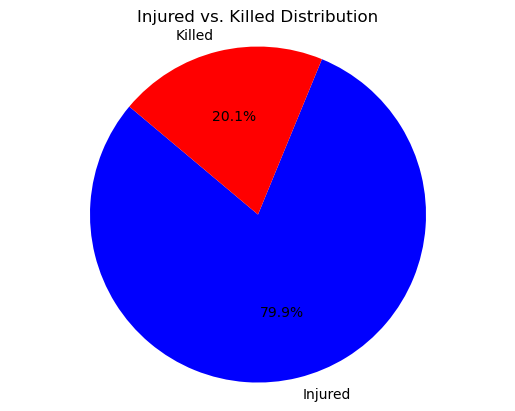

In [12]:
categories = ["Injured", "Killed"]
values = [total_injured, total_killed]
colors = ['blue', 'red']

plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Injured vs. Killed Distribution')
plt.show()

From the results of this analysis, it can be seen that the percentage of deaths and injuries throughout 2021-2023 is:
- Killed: 20.1%.
- Injured: 79.9%.

## Question 4
***Visualization***
- What are the total number of injured and killed victims of firearm violence cases in the US throughout 2021-2023?

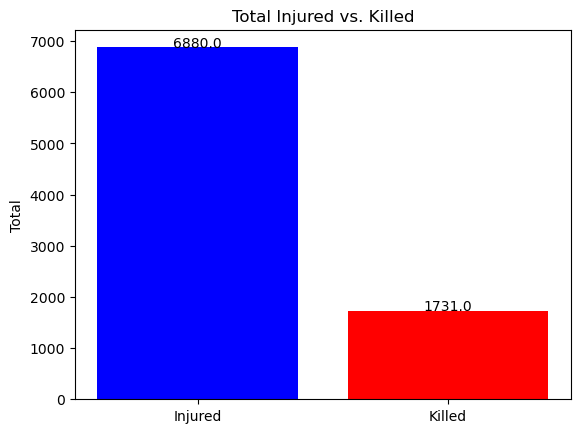

In [13]:
# Create a bar chart
categories = ["Injured", "Killed"]
values = [total_injured, total_killed]

plt.bar(categories, values, color=['blue', 'red'])

# Adding text labels to each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.5, str(v), color='black', ha='center', fontweight='normal')

plt.ylabel('Total')
plt.title('Total Injured vs. Killed')
plt.show()

From the results of this analysis, it can be seen that the total number of injured and killed victims throughout 2021-2023 is:
- Killed: 1,731 people.
- Injured: 6,880 people.

## Question 5
***Visualization***
- Which state in the US has the greatest number of gun violence?

Here we will take the 10 states with the largest amount of gun violence, and visualize the data using a bar chart:

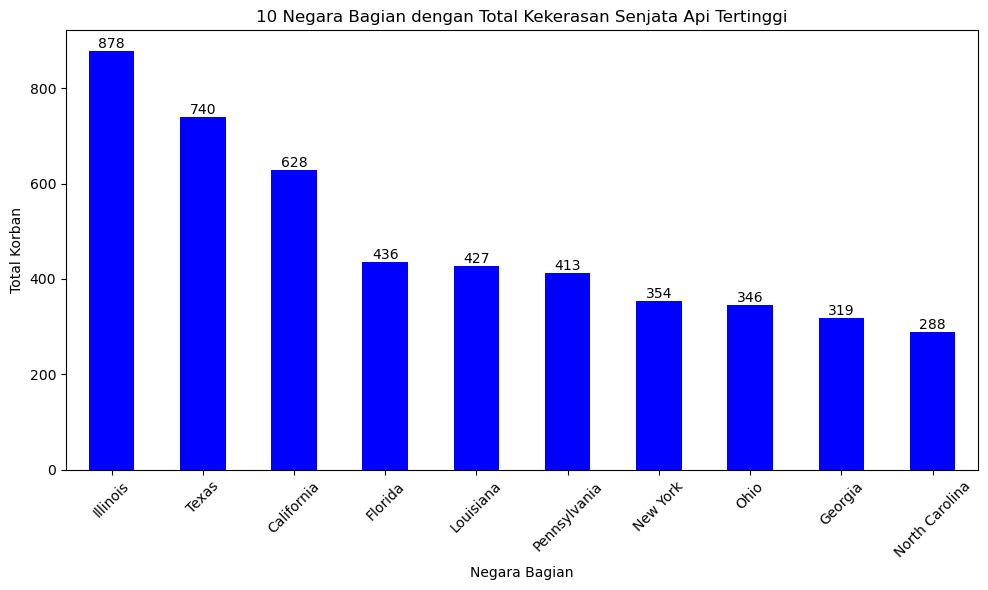

In [14]:
# Calculate total victims (killed + injured) for each state
state_totals = df.groupby('State')[['Killed', 'Injured']].sum()
state_totals['Total'] = state_totals['Killed'] + state_totals['Injured']

# Sorts states by total casualties
state_totals = state_totals.sort_values(by='Total', ascending=False)

# Taking the 10 states with the greatest amount of gun violence
top_states = state_totals.head(10)

# Create a visualization with the victim value displayed in the bar
plt.figure(figsize=(10, 6))
ax = top_states['Total'].plot(kind='bar', color='blue')
plt.title('10 Negara Bagian dengan Total Kekerasan Senjata Api Tertinggi')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Korban')
plt.xticks(rotation=45)
plt.tight_layout()

# Adds the victim value inside each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

From the visualization above, it can be concluded that the state with the most cases of firearm violence is Illinois.

## Question 6
***Visualization***
- Which US state has the lowest number of gun violence?

Here we will take the 10 states with the smallest amount of gun violence, and visualize the data using a bar chart:

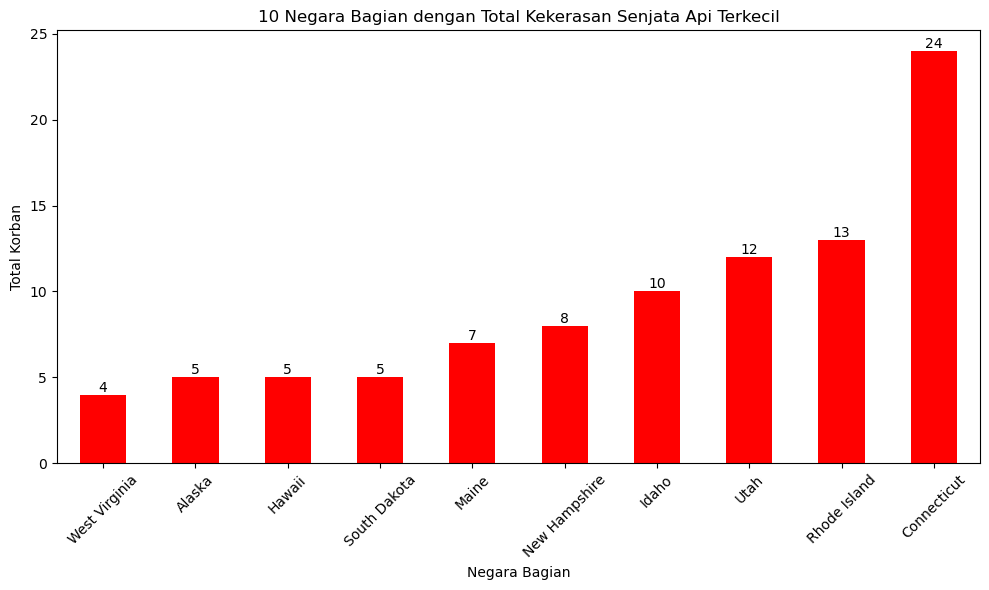

In [15]:
# Calculate total victims (killed + injured) for each state
state_totals = df.groupby('State')[['Killed', 'Injured']].sum()
state_totals['Total'] = state_totals['Killed'] + state_totals['Injured']

# Sort states by total casualties in ascending order (least)
state_totals = state_totals.sort_values(by='Total', ascending=True)

# Taking the 10 states with the least amount of gun violence
bottom_states = state_totals.head(10)

# Create a visualization with the values inside each bar
plt.figure(figsize=(10, 6))
ax = bottom_states['Total'].plot(kind='bar', color='red')
plt.title('10 Negara Bagian dengan Total Kekerasan Senjata Api Terkecil')
plt.xlabel('Negara Bagian')
plt.ylabel('Total Korban')
plt.xticks(rotation=45)
plt.tight_layout()

# Add the values inside each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

From the visualization above, it can be concluded that the state with the fewest cases of gun violence is West Virginia.

## Question 7
***Visualization***
- Which years showed the greatest and least cases of gun violence?

Here we will make an analysis using a horizontal bar chart to answer the question:

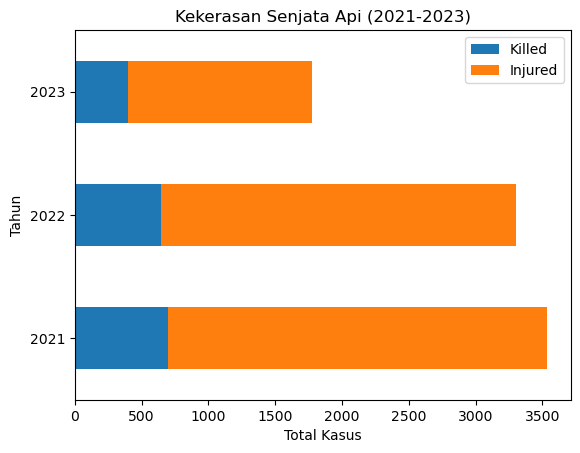

In [16]:
# Filter data between 2021 to 2023
filtered_data = df[(df['Incident Date'].dt.year >= 2021) & (df['Incident Date'].dt.year <= 2023)]

# Group data by year and add up casualties and injuries
yearly_stats = filtered_data.groupby(filtered_data['Incident Date'].dt.year)[['Killed', 'Injured']].sum()

# Create a horizontal bar chart
yearly_stats.plot(kind='barh', stacked=True)
plt.title('Kekerasan Senjata Api (2021-2023)')
plt.xlabel('Total Kasus')
plt.ylabel('Tahun')
plt.legend(['Killed', 'Injured'])
plt.show()

From the results above, it can be concluded that there has been a rather significant decline in cases of firearm violence in the US from 2021-2023. In other words, as the years go by, cases of gun violence decrease in the US.

# 6. Conclusion

In conclusion, cases of gun violence in the US are very disturbing. In 2021 alone, there will be approximately 3,500 cases. But this figure is seen decreasing slightly in 2022, to 3,300 cases. And a significant decline can be seen in 2023 with total cases at 1,700 cases, this shows that the trend/graph of cases of violence caused by firearms in the US in 2021-2023 shows a decreasing trend/graph. This decreasing graph can be caused by many x factors which need to be analyzed further later.

In general, from cases of firearm violence in the US, the total number of victims who died was 1,731 people, and the total number of victims who were injured was 6,880 people per year 2021-2023. On average, the number of victims in each case is around 1 person killed and 4 people injured. And for every case throughout 2021-2023, the value that appears most often from the death toll data is 0, this shows that many cases did not result in death. Meanwhile, the value that appears most often from data on injured victims is 4 people in each case. This can also be proven by the percentage of dead victims at 20.1% and injured victims at 79.9%.

If we look at the results of the analysis above, there are 10 states with very high rates of gun violence, these states are: Illinois, Texas, California, Florida, Louisiana, Pennsylvania, New York, Ohio, Georgia, and North Carolina. The total cases from these states is 4,829 cases. Again, this can be caused by many x factors which must be analyzed further later with more complete data.

After looking at states with very high case rates, here are 10 states with relatively small rates of gun violence in the US: Connecticut, Rhode Island, Utah, Idaho, New Hampshire, Maine, South Dakota, Hawaii, Alaska, and West Virginia. The total number of cases from these states is only 93 cases, not even 100 cases. This can also be caused by many x factors which will need to be analyzed further, whether it is because the population in these states is smaller than others, or the level of security is high, or the human characteristics are different from states with higher levels of security. high cases.

From the explanation above, the answer to the problem statement at the beginning is: the state that is safer from gun violence in the US for 2023 is West Virginia.